In [1]:
%matplotlib inline
import numpy as np
import scqubits as scq

# Bifluxon qubit

[1] Kalashnikov et al., PRX Quantum 1, 010307 (2020). https://doi.org/10.1103/PRXQuantum.1.010307

Bifluxon qubit based Eq. (1) in [1] with EJ disorder in the small Josephson junctions included,


$ H = 4E_{\text{C}}(-i\partial_\theta-n_g)^2-2E_\text{J}\left[\cos\theta\cos(\phi/2) + dE_J\sin\theta\sin(\phi/2)\right]  -4E_\text{CL}\partial_\phi^2+\frac{1}{2}E_L(\phi -\varphi_\text{ext})^2 $


In [2]:
bifluxon = scq.Bifluxon.create()

Output()

In [3]:
phi_grid = scq.Grid1d(-6*np.pi, 6*np.pi, 200)

In [18]:
bifluxon = scq.Bifluxon(grid = phi_grid,
                           EJ   = 27.2,
                           EL   =  0.94,
                           ECL  = 10.0,
                           EC   = 7.7,
                           dEJ = 0.05,
                           ng   = 0.5,
                           flux = 0.5,
                           ncut = 30)

fs= bifluxon.eigenvals(evals_count=12)

# Spectrum vs gate charge at half flux

In [ ]:
ng_list = np.linspace(-1, 1, 150)
bifluxon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False);

# Spectrum vs flux at $n_g = 0.5$

In [11]:
bifluxon = scq.Bifluxon(grid = phi_grid,
                           EJ   = 27.2,
                           EL   =  0.94,
                           ECL  = 10.0,
                           EC   = 7.7,
                           dEJ = 0,
                           ng   = 0.5,
                           flux = 0.23,
                           ncut = 30)

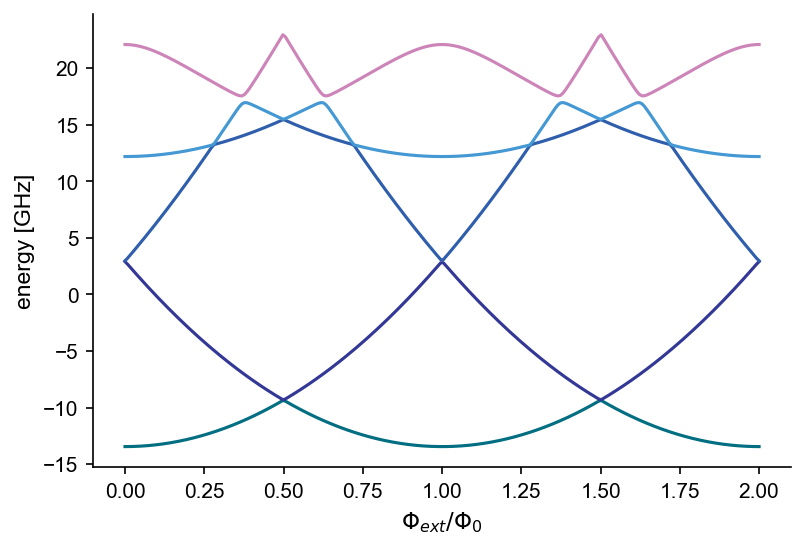

In [51]:
flux_list = np.linspace(0, 2, 250)
bifluxon.ng = 0.5
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=False);


## See spitting due to double phase slips

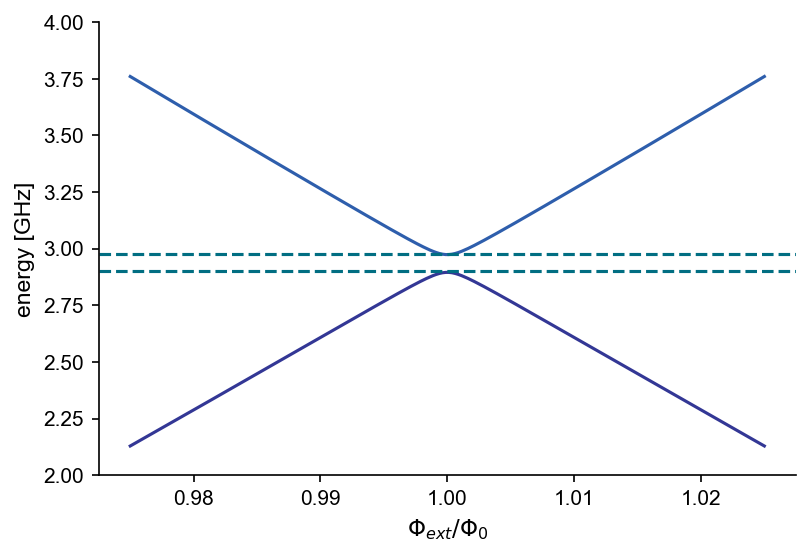

In [120]:
flux_list = np.linspace(0.975,1.025, 200)
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=False,ylim=[2,4]);
ax.axhline(2.9,ls='dashed')
ax.axhline(2.975,ls = 'dashed')

In [107]:
def splitting(EJ,ECL):
    beta = np.sqrt(2*EJ/ECL)
    return np.sqrt(8*EJ*ECL)*np.exp(-beta*np.pi**2)

def beta(EJ,ECL):
    beta = np.sqrt(2*EJ/ECL)
    return beta

def plasma_nu(EJ,ECL):
    return np.sqrt(8*EJ*ECL)

print ("Plasma frequency = ",plasma_nu(27.2,10.0),"GHz")
print ("Splitting =",splitting(27.2,10.0)*1e9,"Hz")

Plasma frequency =  46.647615158762406 GHz
Splitting = 4.693658054289353 Hz


## No spitting due to single phase slips

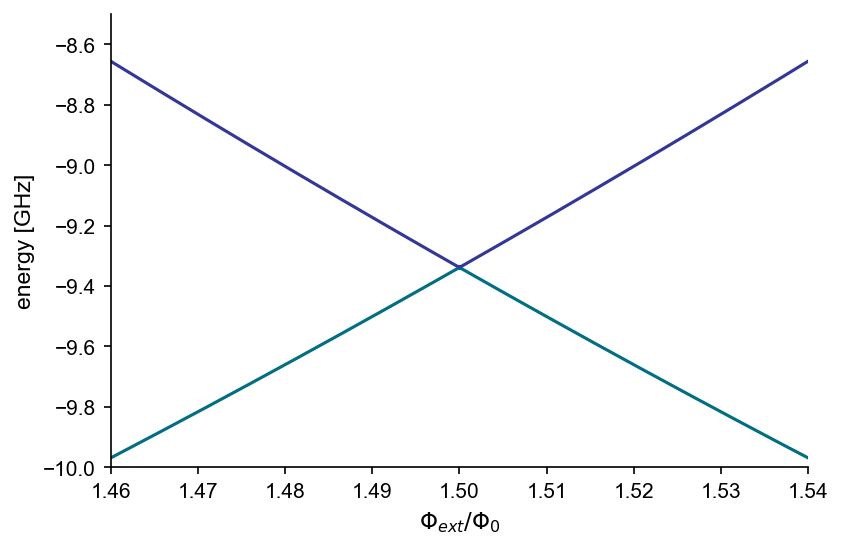

In [74]:
flux_list = np.linspace(1.45, 1.55, 250)
bifluxon.ng = 0.5
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=False,ylim=[-10,-8.5],xlim = [1.46,1.54]);


Above seems consistent with Fig 3(b) of paper

## Comparison with with Fig 4 of [1]

### ng = 0.5

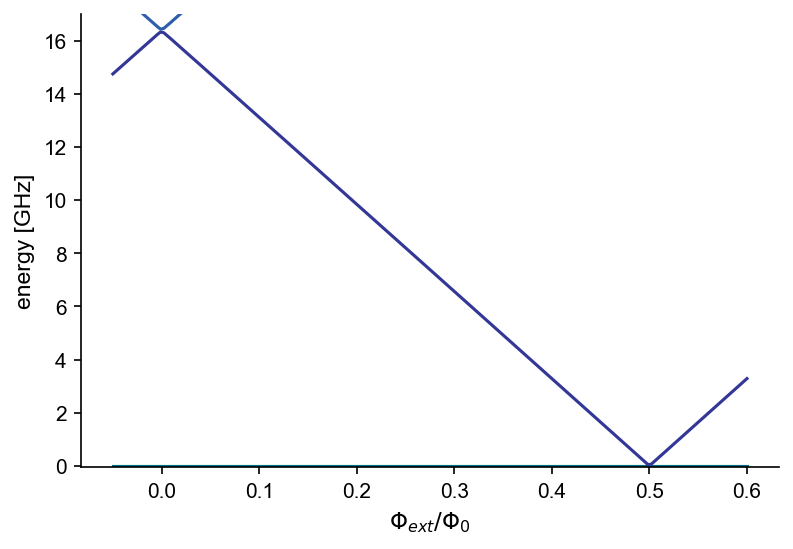

In [67]:
flux_list = np.linspace(-0.05, 0.6, 200)
bifluxon.ng = 0.5
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True,ylim=[-0.05,17]);

### ng = 0.0

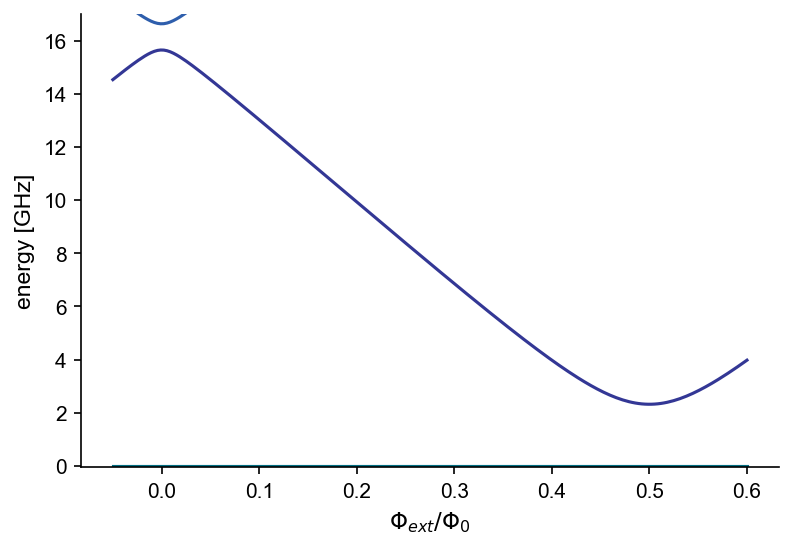

In [68]:
flux_list = np.linspace(-0.05, 0.6, 200)
bifluxon.ng = 0.0
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True,ylim=[-0.05,17]);

### vs ng at $\phi = 0$

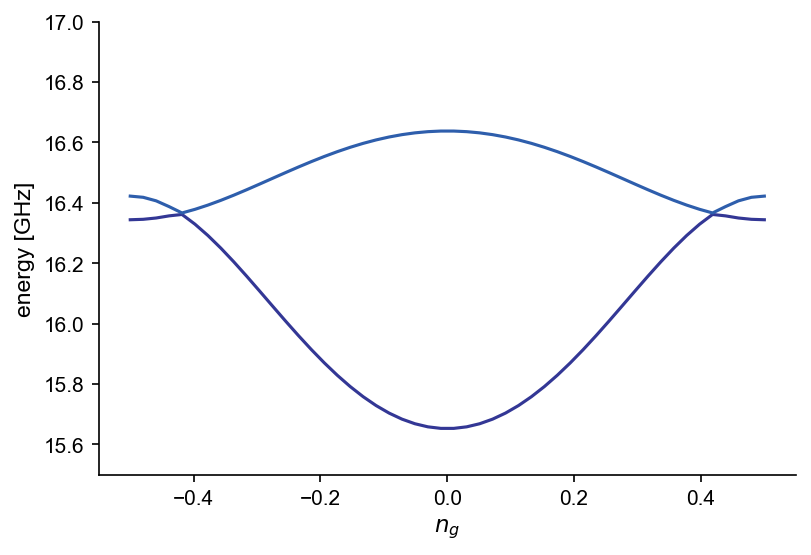

In [71]:
ng_list = np.linspace(-0.5, 0.5, 50)
bifluxon.flux = 0.0
fig,ax = bifluxon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=True,ylim=[15.5,17]);

# Bifluxon potential

$ U = -2E_\text{J}\cos\theta\cos(\phi/2+\varphi_\text{ext}/2) +\frac{1}{2}E_L(\phi)^2 $

Flux put into the junction rather than the inductor

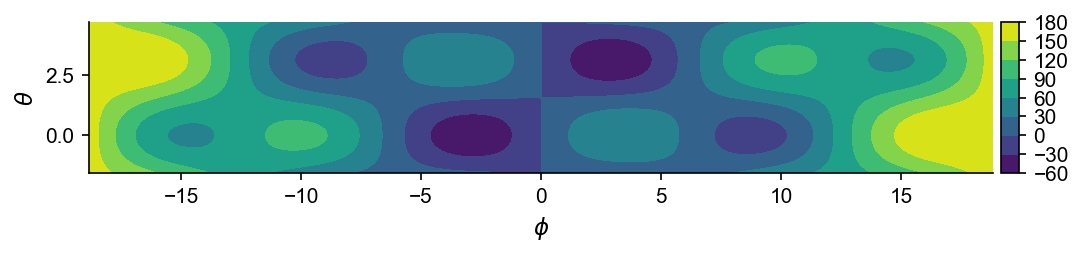

In [40]:
theta_grid = scq.Grid1d(-np.pi/2.0, 3*np.pi/2.0, 200)
bifluxon.plot_potential(theta_grid = theta_grid);

# Wavefunctions at $n_g,\phi_{ext} = 0.5$

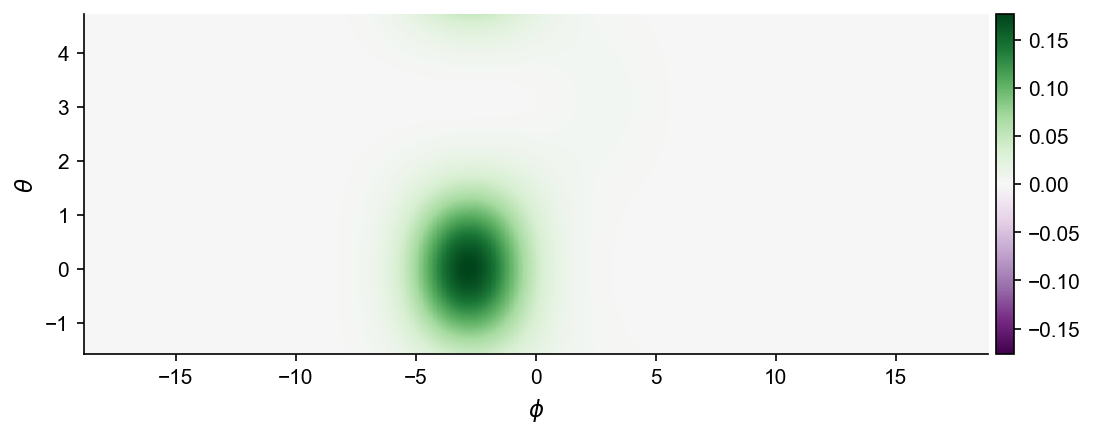

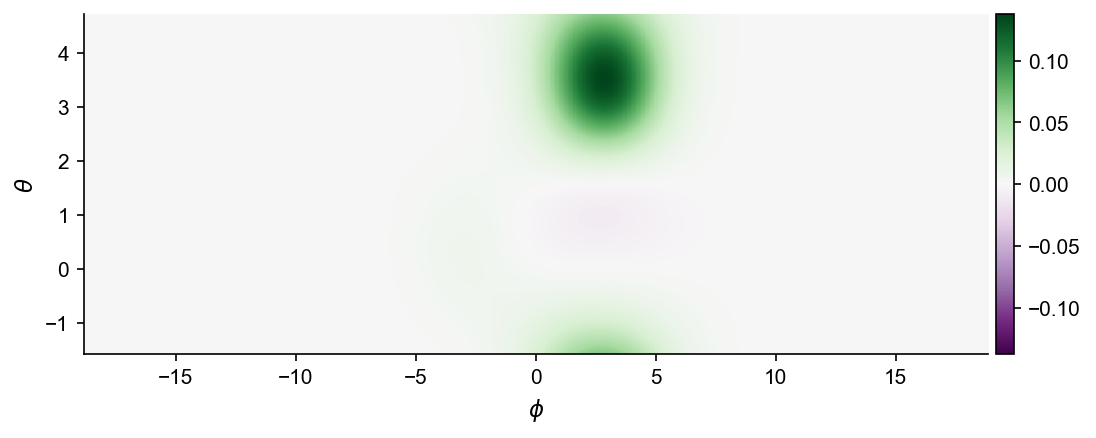

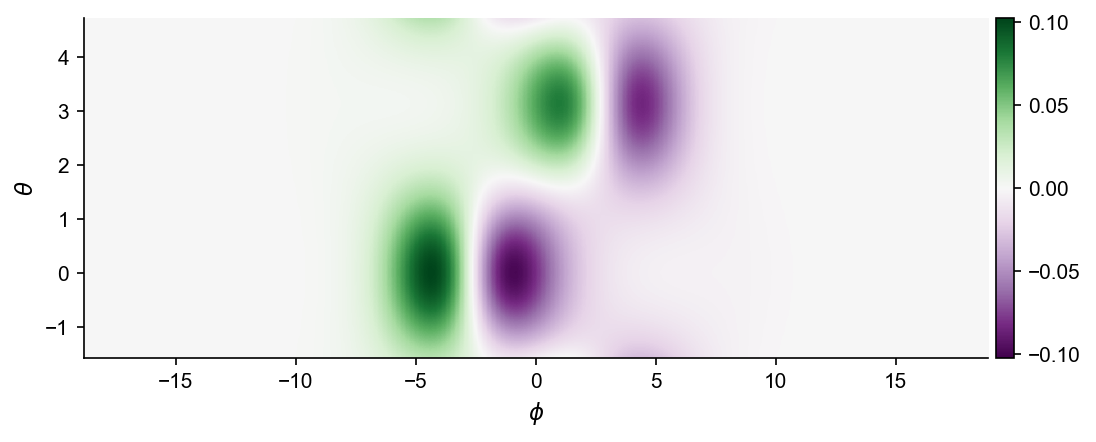

In [63]:
bifluxon.flux = 0.5
bifluxon.ng = 0.5
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=0, mode='real', zero_calibrate=True);
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=1, mode='real', zero_calibrate=True);
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=2, mode='real', zero_calibrate=True);

# Wavefunctions at $n_g = 0.5,\phi_{ext} = 0.0$

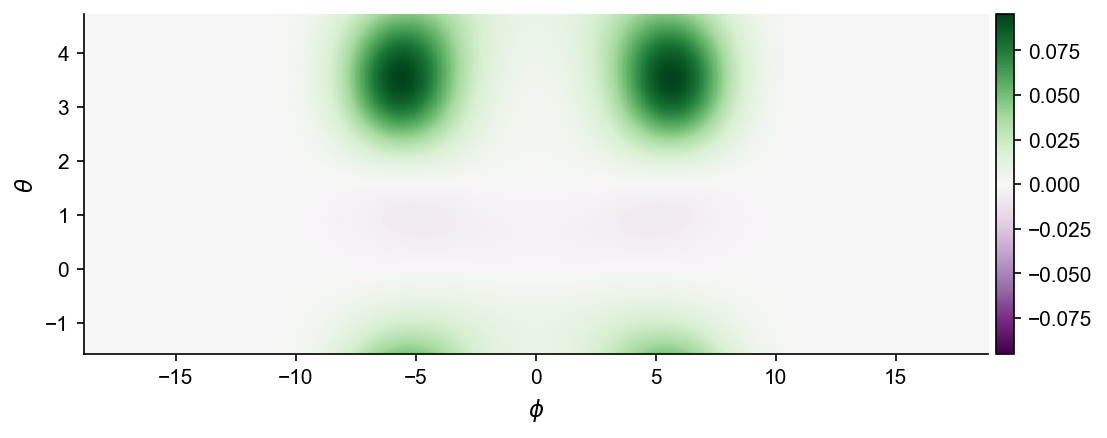

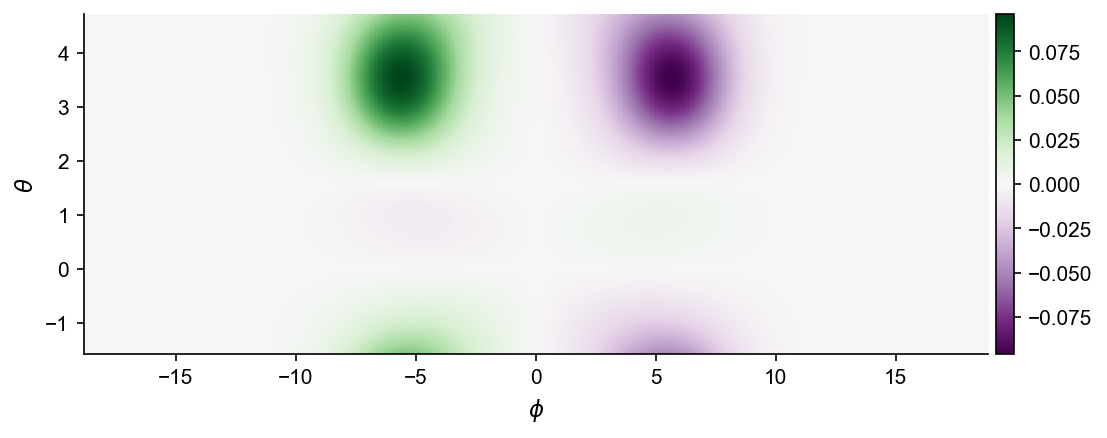

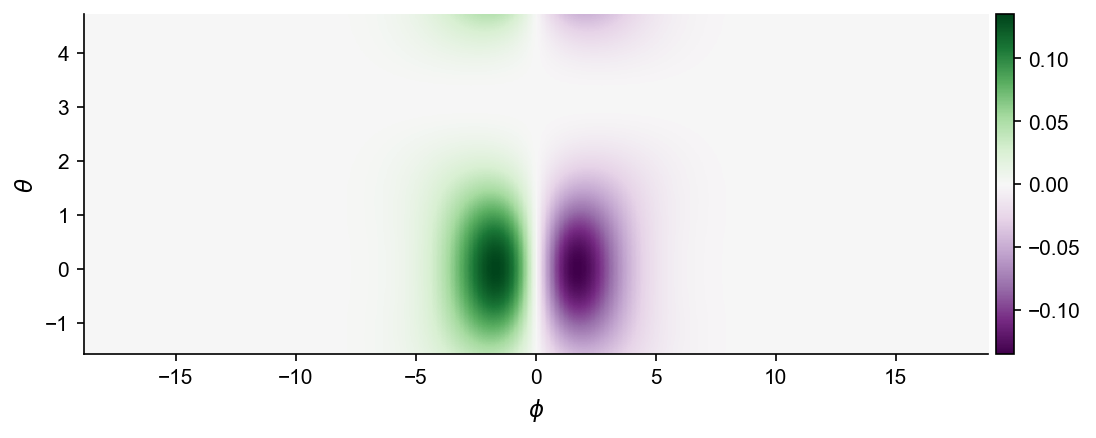

In [61]:
bifluxon.flux = 0.0
bifluxon.ng = 0.5
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=0, mode='real', zero_calibrate=True);
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=1, mode='real', zero_calibrate=True);
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=2, mode='real', zero_calibrate=True);

# Wavefunctions at $n_g = 0.0,\phi_{ext} = 0.5$

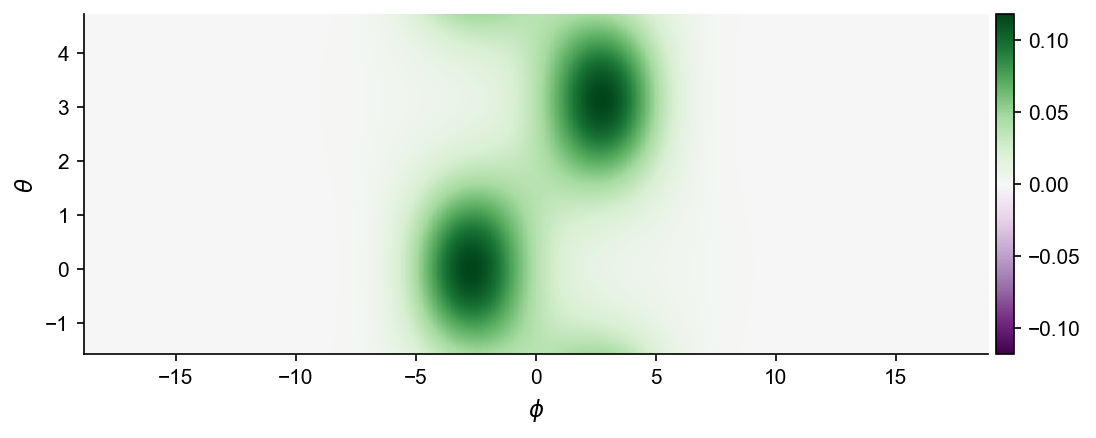

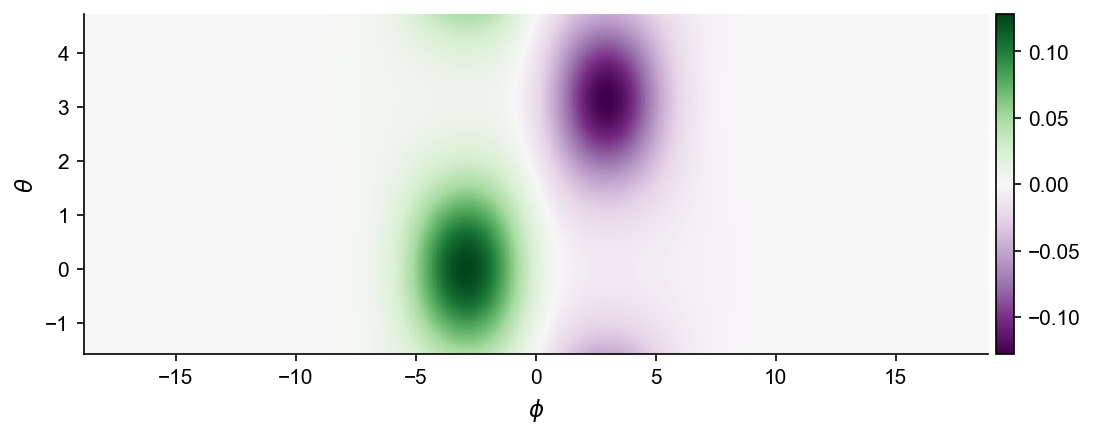

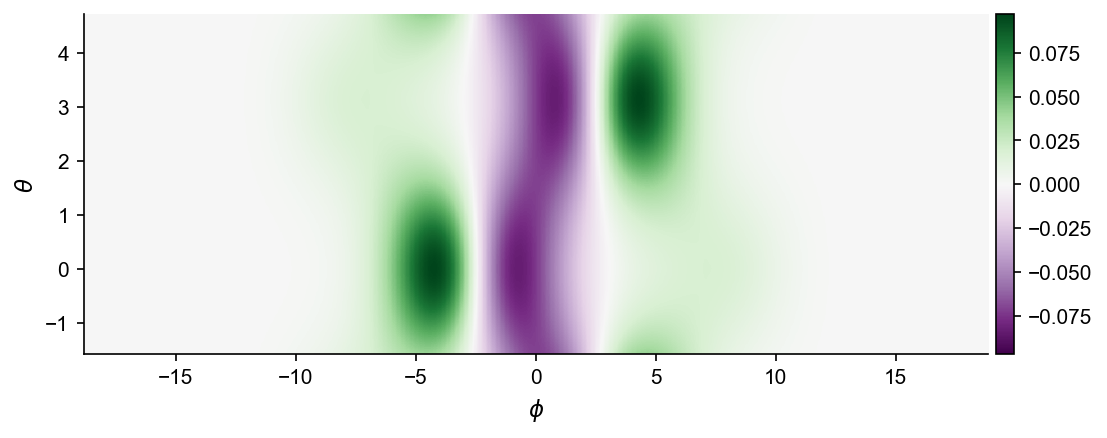

In [72]:
bifluxon.flux = 0.5
bifluxon.ng = 0.0
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=0, mode='real', zero_calibrate=True);
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=1, mode='real', zero_calibrate=True);
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=2, mode='real', zero_calibrate=True);